# **Problem Statement**  
## **23. Implement time-series forecasting using ARIMA.**

Implement time-series forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model to predict future values based on historical data.

### Constraints & Example Inputs/Outputs

### Constraints
- Input: Univariate time-series data
- Output: Forecasted future values
- Data must be stationary (or made stationary)
- ARIMA parameters: (p, d, q)

### Example Input:
```python
Time Series: [120, 132, 141, 150, 160, 170]
Forecast Steps: 3

```

Expected Output:
```python
Forecasted Values: [178.4, 186.1, 193.7]

```

### Solution Approach

**Step 1: Understand ARIMA Components**

| Component | Meaning                              |
| --------- | ------------------------------------ |
| AR (p)    | Uses past values                     |
| I (d)     | Differencing to make data stationary |
| MA (q)    | Uses past forecast errors            |

**Step 2: Check Stationarity**
- Use rolling mean
- Use ADF (Augmented Dickey-Fuller) test

**Step 3: Build ARIMA Model**
- Choose (p, d, q)
- Fit model
- Forecast future values

### Solution Code

In [2]:
!pip3 install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 35.7 MB/s  0:00:00.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]


In [4]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [5]:
# Step 2: Sample Time-Series Data
# Sample monthly sales data
data = [120, 132, 141, 150, 160, 170, 180, 190, 205, 215, 230, 245]

ts = pd.Series(data)
ts


0     120
1     132
2     141
3     150
4     160
5     170
6     180
7     190
8     205
9     215
10    230
11    245
dtype: int64

In [6]:
# Approach 1: Brute FDorce Approach (Manual ARIMA Parameters)
#Manually chooser (p,d,q)

# Check stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    return result[1]  # p-value

adf_test(ts)

# Check stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    return result[1]  # p-value

adf_test(ts)


np.float64(0.998617256388043)

In [7]:
# Train ARIMA (Manual Parameters)
model_brute = ARIMA(ts, order=(1, 1, 1))
model_brute_fit = model_brute.fit()

forecast_brute = model_brute_fit.forecast(steps=3)
forecast_brute


/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


12    258.762670
13    272.471212
14    286.125839
Name: predicted_mean, dtype: float64

### Alternative Solution

In [8]:
# Approach 2: Optimized Approach (Auto ARIMA Parameter Search
# Best practice: test multiple (p,d,q) combinations

best_aic = float("inf")
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(ts, order=(p, d, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
            except:
                continue

best_order


/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

(1, 1, 2)

In [9]:
# Train optimized model
model_opt = ARIMA(ts, order=best_order)
model_opt_fit = model_opt.fit()

forecast_opt = model_opt_fit.forecast(steps=3)
forecast_opt


/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


12    258.964683
13    274.224191
14    289.381562
Name: predicted_mean, dtype: float64

### Alternative Approaches

- SARIMA (Seasonal ARIMA)
- Holt-Winters Exponential Smoothing
- Facebook Prophet
- LSTM / Transformer-based forecasting

### Test Case

In [10]:
# Test Case 1: Forecast Next 3 Values
forecast = model_opt_fit.forecast(steps=3)
print("Forecast:", forecast.values)

assert len(forecast) == 3
print("Test Case 1 Passed")


Forecast: [258.96468273 274.22419083 289.38156171]
Test Case 1 Passed


In [11]:
# Test Case 2: Forecast Next 5 Vlaues
forecast_5 = model_opt_fit.forecast(steps=5)
forecast_5


12    258.964683
13    274.224191
14    289.381562
15    304.437479
16    319.392622
Name: predicted_mean, dtype: float64

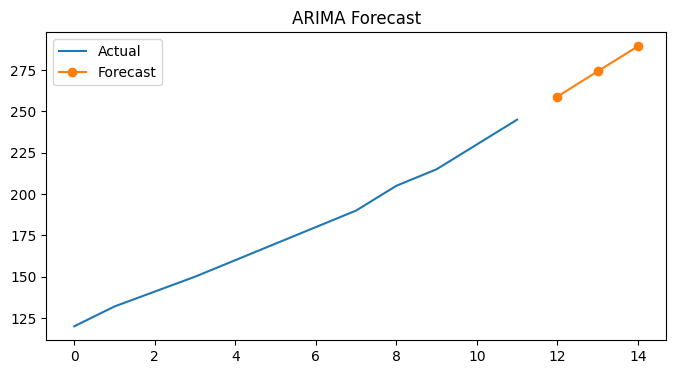

In [12]:
# Test Case 3: Plot Forecast vs Actual
plt.figure(figsize=(8,4))
plt.plot(ts, label="Actual")
plt.plot(
    range(len(ts), len(ts)+3),
    forecast_opt,
    label="Forecast",
    marker="o"
)
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


In [13]:
# Test Case 4: New Time Series
new_data = pd.Series([30, 35, 40, 45, 50, 55, 60])

model_new = ARIMA(new_data, order=(1,1,1))
fit_new = model_new.fit()

fit_new.forecast(steps=2)


/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/piai/jupyter_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7    64.999886
8    69.999577
Name: predicted_mean, dtype: float64

## Complexity Analysis

**ARIMA**
- Training Time: O(n²)
- Prediction Time: O(k)
- Space: O(n)

Where:

n = length of time series

k = forecast steps

#### Thank You!!